<a href="https://colab.research.google.com/github/nivedha75/Columbia-Summer-Coursework/blob/master/Copy_of_ModelEvaluation_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Let's try it in Python.




## 1. Load our data

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/gdrive')

df_iris = pd.read_csv('/content/gdrive/My Drive/iris.csv')
df_titanic = pd.read_csv('/content/gdrive/My Drive/titanic (1).csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## 2. Some Quick EDA

```
df_iris.head()
```

In [ ]:
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df_iris['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

```
import seaborn as sns
sns.boxplot(x='Species', y="SepalLengthCm", data=df_iris)
```

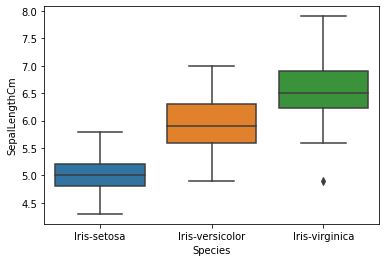

In [ ]:
import seaborn as sns
sns.boxplot(x='Species', y="SepalLengthCm", data=df_iris)

```
sns.boxplot(x='Species', y="SepalWidthCm", data=df_iris)
```

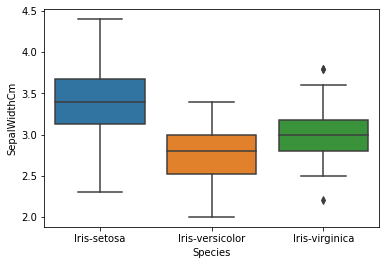

In [ ]:
sns.boxplot(x='Species', y="SepalWidthCm", data=df_iris)

```
sns.boxplot(x='Species', y="PetalLengthCm", data=df_iris)
```

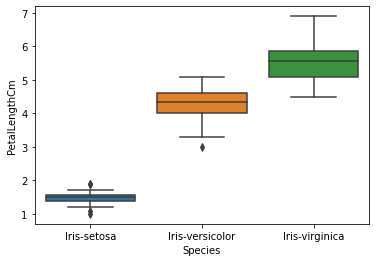

In [ ]:
sns.boxplot(x='Species', y="PetalLengthCm", data=df_iris)

```
sns.boxplot(x='Species', y="PetalWidthCm", data=df_iris)
```

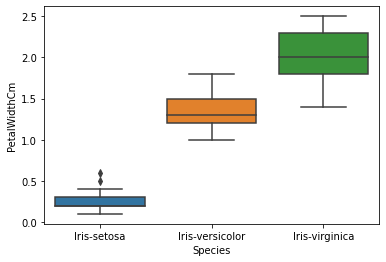

In [ ]:
sns.boxplot(x='Species', y="PetalWidthCm", data=df_iris)


```
df_titanic.head()
```

In [ ]:
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


```
sns.boxplot(x='Survived', y="Age", data=df_titanic)
```

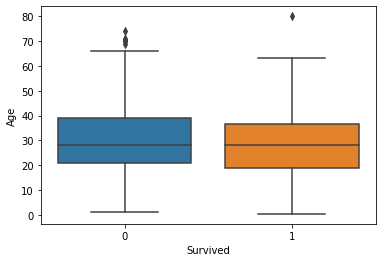

In [ ]:
sns.boxplot(x='Survived', y="Age", data=df_titanic)

```
df_titanic['familysize'] = df_titanic['Siblings/Spouses Aboard'] + df_titanic['Parents/Children Aboard'] + 1
```

In [ ]:
df_titanic['familysize'] = df_titanic['Siblings/Spouses Aboard'] + df_titanic['Parents/Children Aboard'] + 1

```
sns.boxplot(x='Survived', y="familysize", data=df_titanic)
```



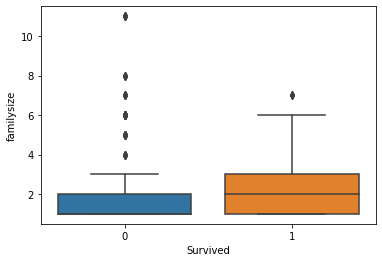

In [ ]:
sns.boxplot(x='Survived', y="familysize", data=df_titanic)

```
df_titanic['alone'] = 0
df_titanic.loc[df_titanic['familysize'] == 1,'alone'] = 1

pd.crosstab(df_titanic.Survived, df_titanic.alone).apply(lambda r: r/r.sum(), axis=1)
```

In [ ]:
df_titanic['alone'] = 0
df_titanic.loc[df_titanic['familysize'] == 1,'alone'] = 1
 
pd.crosstab(df_titanic.Survived, df_titanic.alone).apply(lambda r: r/r.sum(), axis=1)

alone,0,1
Survived,,
0,0.321101,0.678899
1,0.523392,0.476608


## 3. Standardize the data

```
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled = scaler.fit_transform(df_iris[['SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm']])


df_scaled = pd.DataFrame(data=scaled, columns=['SepalLengthCm_scaled',
 'SepalWidthCm_scaled',
 'PetalLengthCm_scaled',
 'PetalWidthCm_scaled'])

df_iris = df_iris.join(df_scaled)

```

In [ ]:
from sklearn.preprocessing import MinMaxScaler
 
scaler = MinMaxScaler()
 
scaled = scaler.fit_transform(df_iris[['SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm']])
 
 
df_scaled = pd.DataFrame(data=scaled, columns=['SepalLengthCm_scaled',
 'SepalWidthCm_scaled',
 'PetalLengthCm_scaled',
 'PetalWidthCm_scaled'])
 
df_iris = df_iris.join(df_scaled)
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalLengthCm_scaled,SepalWidthCm_scaled,PetalLengthCm_scaled,PetalWidthCm_scaled
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0.222222,0.625000,0.067797,0.041667
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0.166667,0.416667,0.067797,0.041667
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0.111111,0.500000,0.050847,0.041667
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0.083333,0.458333,0.084746,0.041667
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0.194444,0.666667,0.067797,0.041667


```
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled = scaler.fit_transform(df_titanic[['Fare','Age','familysize']])


df_scaled = pd.DataFrame(data=scaled, columns=['Fare_scaled',
 'Age_scaled','familysize_scaled'])

df_titanic = df_titanic.join(df_scaled)
```

In [ ]:
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
 
scaled = scaler.fit_transform(df_titanic[['Fare','Age','familysize']])
 
 
df_scaled = pd.DataFrame(data=scaled, columns=['Fare_scaled',
 'Age_scaled','familysize_scaled'])
 
df_titanic = df_titanic.join(df_scaled)
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,familysize,alone,Fare_scaled,Age_scaled,familysize_scaled
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,2,0,-0.503586,-0.529366,0.056543
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,2,0,0.783412,0.604265,0.056543
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,1,1,-0.490020,-0.245958,-0.562638
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,2,0,0.417948,0.391709,0.056543
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,1,1,-0.487507,0.391709,-0.562638


## 4. Run the model - with Cross-Validation


```
from sklearn.utils import shuffle
df_iris = shuffle(df_iris)
```

In [ ]:
from sklearn.utils import shuffle
df_iris = shuffle(df_iris)

```
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

KNN = KNeighborsClassifier(n_neighbors=5)

X = df_iris[['PetalLengthCm_scaled']]
y = df_iris['Species']

cv = KFold(n_splits=5, shuffle=False)

print(cross_val_score(KNN, X, y, cv=cv, scoring = 'f1_macro'))
```

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
 
KNN = KNeighborsClassifier(n_neighbors=5)
 
X = df_iris[['PetalLengthCm_scaled']]
y = df_iris['Species']

cv = KFold(n_splits=5, shuffle=True)

print(cross_val_score(KNN, X, y, cv=cv, scoring = 'f1_macro'))

[1.         0.93732194 0.9658994  0.88854489 0.96451914]


```
# Stratified k-fold: each iteration tries to maintain the same proportion of overall classes

print(cross_val_score(KNN, X, y, cv=5, scoring = 'f1_macro'))
```

In [ ]:
print(cross_val_score(KNN, X, y, cv=5, scoring = 'f1_macro'))

[0.93333333 1.         0.89974937 0.93333333 0.96658312]


```
import numpy as np

scores = cross_val_score(KNN, X, y, cv=cv, scoring = 'f1_macro')
print(np.mean(scores))
```

In [ ]:
import numpy as np
#default here is Stratified
scores = cross_val_score(KNN, X, y, cv=5, scoring = 'f1_macro')
print(np.mean(scores))
df_titanic

0.9532497911445279


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,familysize,alone,Fare_scaled,Age_scaled,familysize_scaled
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,2,0,-0.503586,-0.529366,0.056543
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,2,0,0.783412,0.604265,0.056543
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,1,1,-0.490020,-0.245958,-0.562638
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,2,0,0.417948,0.391709,0.056543
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,1,1,-0.487507,0.391709,-0.562638
...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000,1,1,-0.388018,-0.175106,-0.562638
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000,1,1,-0.046336,-0.741922,-0.562638
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500,4,0,-0.177984,-1.592145,1.294904
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000,1,1,-0.046336,-0.245958,-0.562638


Run Logistic Regression to predict who survived using the Titanic dataset. Output the cross-validated performance using K-Fold Cross-Validation. 

In [ ]:
from sklearn.linear_model import LogisticRegression

#Simply makes LR a Linear Regression algorithm (no X and Y determined)
LogR=LogisticRegression()
 
X = df_titanic[['Age_scaled', 'Fare_scaled']]
y = df_titanic['Survived']

#This creates the best-line-of-fit in one step (gradient descent or normalization happens internally)
#Thus, we do not see iterations where parameters are being updated (as in gradient descent)
#It plots the best line straight through the data points in one step
LR.fit(X, y)

#cv = KFold(n_splits=5, shuffle=False)

print(cross_val_score(LogR, X, y, cv=5, scoring = 'f1_macro'))
scores = cross_val_score(LogR, X, y, cv=5, scoring = 'f1_macro')
print(np.mean(scores))

[0.4796167  0.6384375  0.54472287 0.55721857 0.56143199]
0.5562855248412406


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

#Simply makes LR a Linear Regression algorithm (no X and Y determined)
LogR=LogisticRegression()
 
X = df_titanic[['Age_scaled', 'Fare_scaled']]
y = df_titanic['Survived']

#This creates the best-line-of-fit in one step (gradient descent or normalization happens internally)
#Thus, we do not see iterations where parameters are being updated (as in gradient descent)
#It plots the best line straight through the data points in one step
LR.fit(X, y)

cv = StratifiedKFold(n_splits=5, shuffle=True)

print(cross_val_score(LogR, X, y, cv=5, scoring = 'f1_macro'))
scores = cross_val_score(LogR, X, y, cv=5, scoring = 'f1_macro')
print(np.mean(scores))
#cross_val_score()

[0.4796167  0.6384375  0.54472287 0.55721857 0.56143199]
0.5562855248412406


### Other Cross-validation methods

There are many other cross-validation methods that you can use. For example, when working with any Time Series data, you want to use a cross-validation method where are training set is never after our test set, because at any point in time, we will never know future values, only historical values.

What is Stratified K Fold? When is it useful? See if you can do some research and apply Stratified K Fold to the previous question.

## Hold-out Set

Create a hold out set to test your prediction on observations your model has NEVER seen before. This is to mimick applying your model to the real-world.

```
len(df_iris)
```

In [ ]:
len(df_iris)

150

```
df_iris_train = df_iris.sample(100)
df_iris_holdout = df_iris.drop(df_iris_train.index)
```

In [ ]:
df_iris_train = df_iris.sample(100)
df_iris_holdout = df_iris.drop(df_iris_train.index)

```
KNN = KNeighborsClassifier(n_neighbors=5)

X_train = df_iris_train[['PetalLengthCm_scaled']]
y_train = df_iris_train['Species']

cv = KFold(n_splits=5, shuffle=False,random_state=1)
 
scores = cross_val_score(KNN, X, y, cv=cv, scoring = 'f1_macro')

print(np.mean(scores))
```

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=5)
 
X_train = df_iris_train[['PetalLengthCm_scaled']]
y_train = df_iris_train['Species']
 
cv = KFold(n_splits=5, shuffle=False,random_state=1)
 
scores = cross_val_score(KNN, X_train, y_train, cv=cv, scoring = 'f1_macro')
 
print(np.mean(scores))

0.9534505650295124


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


```
from sklearn.metrics import f1_score

X_holdout = df_iris_holdout[['PetalLengthCm_scaled']]
KNN.fit(X_train,y_train)
df_iris_holdout['prediction'] = KNN.predict(X_holdout)

print(f1_score(df_iris_holdout['Species'],df_iris_holdout['prediction'],average='macro'))
```

In [ ]:
from sklearn.metrics import f1_score
 
X_holdout = df_iris_holdout[['PetalLengthCm_scaled']]
KNN.fit(X_train,y_train)
df_iris_holdout['prediction'] = KNN.predict(X_holdout)
 
print(f1_score(df_iris_holdout['Species'],df_iris_holdout['prediction'],average='macro'))

0.9416863672182821


# Feature Importance

How can you test models with several different feature sets all at once? How do you know which features are stronger predictors than other features? At which point does performance go down?

```
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
```

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt


```
KNN = KNeighborsClassifier(n_neighbors=5)

X = df_iris[['SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm']]

y = df_iris['Species']
```

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=5)
 
X = df_iris[['SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm']]
 
y = df_iris['Species']

```
sfs = SFS(KNN, 
          k_features=4, 
          scoring='f1_macro',
          cv=5)
sfs = sfs.fit(X, y)
sfs.get_metric_dict()
```

In [ ]:
sfs = SFS(KNN, 
          k_features=4, 
          scoring='f1_macro',
          cv=5)
sfs = sfs.fit(X, y)
sfs.get_metric_dict()

{1: {'avg_score': 0.9598319029897976,
  'ci_bound': 0.03223556855687204,
  'cv_scores': array([0.96658312, 0.96658312, 0.93333333, 0.93265993, 1.        ]),
  'feature_idx': (3,),
  'feature_names': ('PetalWidthCm',),
  'std_dev': 0.025080367485459113,
  'std_err': 0.012540183742729557},
 2: {'avg_score': 0.9664818612187034,
  'ci_bound': 0.027370476019954387,
  'cv_scores': array([0.96658312, 0.96658312, 0.93265993, 0.96658312, 1.        ]),
  'feature_idx': (2, 3),
  'feature_names': ('PetalLengthCm', 'PetalWidthCm'),
  'std_dev': 0.021295160208553578,
  'std_err': 0.010647580104276789},
 3: {'avg_score': 0.9665831244778612,
  'ci_bound': 0.04704981312704936,
  'cv_scores': array([0.96658312, 1.        , 0.89974937, 0.96658312, 1.        ]),
  'feature_idx': (0, 2, 3),
  'feature_names': ('SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm'),
  'std_dev': 0.036606353049635165,
  'std_err': 0.01830317652481758},
 4: {'avg_score': 0.973165236323131,
  'ci_bound': 0.03235022398119134,
  'cv

```
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()
```

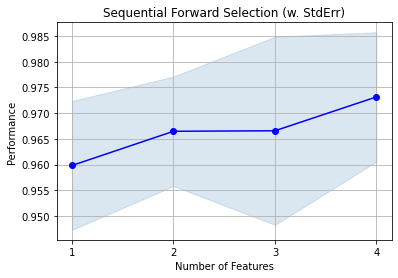

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()
df_iris.head()

In [ ]:
df_titanic

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,familysize,alone,Fare_scaled,Age_scaled,familysize_scaled
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,2,0,-0.503586,-0.529366,0.056543
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,2,0,0.783412,0.604265,0.056543
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,1,1,-0.490020,-0.245958,-0.562638
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,2,0,0.417948,0.391709,0.056543
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,1,1,-0.487507,0.391709,-0.562638
...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000,1,1,-0.388018,-0.175106,-0.562638
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000,1,1,-0.046336,-0.741922,-0.562638
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500,4,0,-0.177984,-1.592145,1.294904
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000,1,1,-0.046336,-0.245958,-0.562638


In [ ]:
LogR = LogisticRegression()
 
X = df_titanic[['Fare_scaled',
 'S',
 'PetalLengthCm',
 'PetalWidthCm']]
 
y = df_iris['Species']

sfs = SFS(LogR, 
          k_features=4, 
          scoring='f1_macro',
          cv=5)
sfs = sfs.fit(X, y)
sfs.get_metric_dict()

NameError: ignored

### Challenge

- Using the Boston Housing Data, pick one of the models you have used so far and output a cross-validated performance score.
- Add several (or all available) features to your model and determine the best set of features using SFS. 